In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
df.drop('Id', axis=1, inplace=True)
train_df = df.drop('Class', axis=1)
test_df = df['Class']
# change B values to 1 and A values to 0
train_df['EJ'] = train_df['EJ'].map({'A': 0, 'B': 1})
# replace null values with the mean of the column
train_df.fillna(train_df.mean(), inplace=True)
print(train_df['EJ'].value_counts())

1    395
0    222
Name: EJ, dtype: int64


In [3]:

test_df.head()

0    1
1    0
2    0
3    0
4    1
Name: Class, dtype: int64

In [4]:

X_train, X_test, y_train, y_test = train_test_split(train_df, test_df,
                                                    test_size=0.2,
                                                    random_state=4)
rf = RandomForestClassifier(n_estimators=100, max_features=10, random_state=4)
rf.fit(X_train, y_train)  
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['0', '1']))
print('Test Accuray: {:.3f}'.format(rf.score(X_test,y_test)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       106
           1       0.71      0.67      0.69        18

    accuracy                           0.91       124
   macro avg       0.82      0.81      0.82       124
weighted avg       0.91      0.91      0.91       124

Test Accuray: 0.911


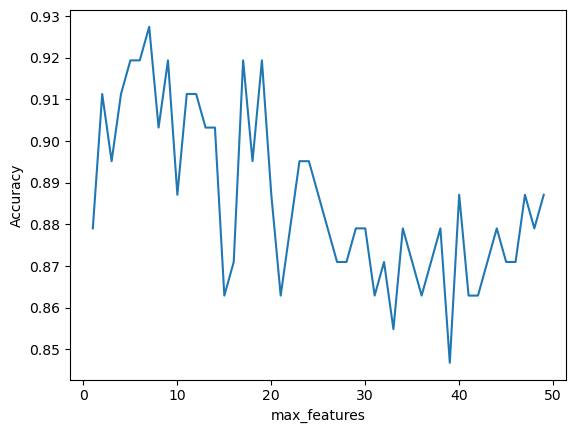

0.9274193548387096
6
[0.8790322580645161, 0.9112903225806451, 0.8951612903225806, 0.9112903225806451, 0.9193548387096774, 0.9193548387096774, 0.9274193548387096, 0.9032258064516129, 0.9193548387096774, 0.8870967741935484, 0.9112903225806451, 0.9112903225806451, 0.9032258064516129, 0.9032258064516129, 0.8629032258064516, 0.8709677419354839, 0.9193548387096774, 0.8951612903225806, 0.9193548387096774, 0.8870967741935484, 0.8629032258064516, 0.8790322580645161, 0.8951612903225806, 0.8951612903225806, 0.8870967741935484, 0.8790322580645161, 0.8709677419354839, 0.8709677419354839, 0.8790322580645161, 0.8790322580645161, 0.8629032258064516, 0.8709677419354839, 0.8548387096774194, 0.8790322580645161, 0.8709677419354839, 0.8629032258064516, 0.8709677419354839, 0.8790322580645161, 0.8467741935483871, 0.8870967741935484, 0.8629032258064516, 0.8629032258064516, 0.8709677419354839, 0.8790322580645161, 0.8709677419354839, 0.8709677419354839, 0.8870967741935484, 0.8790322580645161, 0.8870967741935484

In [5]:
# run 50 iterations of the model each with a different max_features value
# and store the accuracy of each model
accuracy = []
for i in range(1,50):
    rf = RandomForestClassifier(n_estimators=100, max_features=i, random_state=5)
    rf.fit(X_train, y_train)  
    y_pred = rf.predict(X_test)
    accuracy.append(rf.score(X_test,y_test)) 
plt.plot(range(1,50), accuracy)
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()
# print index and value of  accuracy list
print(max(accuracy))    
print(accuracy.index(max(accuracy)))
print(accuracy)

In [6]:
    def remove_var(X_train, per = 0.1):
        # Calculate the variance of each column
        variances = X_train.var()
        
        # Sort variances in descending order and select the top 20% most variable columns
        top_var = int(len(variances) * per)
        high_variance_columns = variances.nlargest(top_var).index
        X_train.drop(columns=high_variance_columns, inplace=True)
        
        return X_train, high_variance_columns

train_df, high_variance_columns = remove_var(train_df)
X_train, X_test, y_train, y_test = train_test_split(train_df, test_df,
                                                    test_size=0.2, random_state= 4)
rf = RandomForestClassifier(n_estimators=100, max_features=5, random_state=4)
rf.fit(X_train, y_train)  
test_df_1 = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
test_ds_pd = test_df_1.drop('Id' ,axis=1)
test_ds_pd['EJ'] = test_ds_pd['EJ'].map({'A': 0, 'B': 1})
test_ds_pd.fillna(test_ds_pd.mean(), inplace=True)
test_ds_pd.drop(columns=high_variance_columns, inplace=True)
predictions = rf.predict_proba(test_ds_pd)
df = pd.DataFrame({'Id': test_df_1.Id, 'class_0': predictions[:,0], 'class_1': predictions[:,1]})
df.to_csv('/kaggle/working/submission.csv', index=False)
df

,Id,class_0,class_1
0,00eed32682bb,0.54,0.46
1,010ebe33f668,0.54,0.46
2,02fa521e1838,0.54,0.46
3,040e15f562a2,0.54,0.46
4,046e85c7cc7f,0.54,0.46


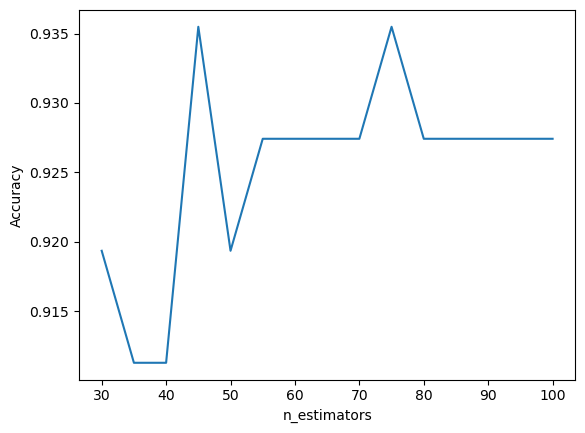

0.9354838709677419
3
[0.9193548387096774, 0.9112903225806451, 0.9112903225806451, 0.9354838709677419, 0.9193548387096774, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9354838709677419, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096, 0.9274193548387096]


In [7]:
# run 50 iterations of the model each with a different max_features value
# and store the accuracy of each model
accuracy = []
for i in range(30,101,5):
    rf = RandomForestClassifier(n_estimators=i, max_features=5, random_state=4)
    rf.fit(X_train, y_train)  
    y_pred = rf.predict(X_test)
    accuracy.append(rf.score(X_test,y_test)) 
plt.plot(range(30,101,5), accuracy)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()
# print index and value of  accuracy list
print(max(accuracy))
print(accuracy.index(max(accuracy)))
print(accuracy)

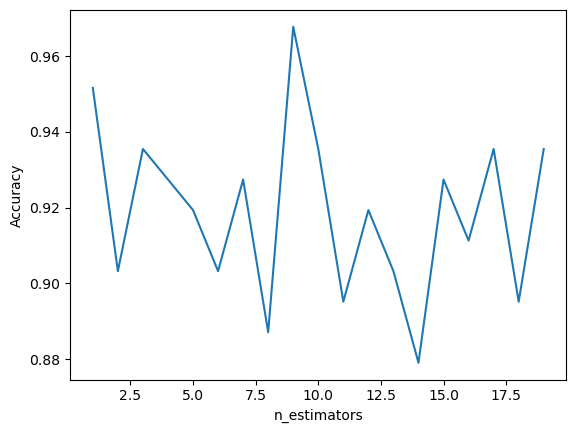

[0.9516129032258065, 0.9032258064516129, 0.9354838709677419, 0.9274193548387096, 0.9193548387096774, 0.9032258064516129, 0.9274193548387096, 0.8870967741935484, 0.967741935483871, 0.9354838709677419, 0.8951612903225806, 0.9193548387096774, 0.9032258064516129, 0.8790322580645161, 0.9274193548387096, 0.9112903225806451, 0.9354838709677419, 0.8951612903225806, 0.9354838709677419]


In [8]:
# check random state acuracy
accuracy = []
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(train_df, test_df,
                                                    test_size=0.2, random_state= i)
    rf = RandomForestClassifier(n_estimators=100, max_features=5, random_state=4)
    rf.fit(X_train, y_train)  
    y_pred = rf.predict(X_test)
    accuracy.append(rf.score(X_test,y_test)) 
plt.plot(range(1,20), accuracy)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()
print(accuracy)